#  차원의 저주 (Curse of Dimensionality)


* 차원이 증가함에 따라 학습 데이터 수가 상대적으로 부족해져 모델 성능이 저하되는 현상
* **변수가 많다고 항상 발생하는 건 아님**, **관측치 수 < 변수 수**일 때 문제가 발생


![https://datapedia.tistory.com/15
](https://d.pr/i/knryou+)


**💡 주요 문제점**


1. **데이터 희소성 증가**


   * 고차원 공간에서 데이터가 드문드문 퍼짐 → 유사한 데이터 찾기 어려움 → 일반화 성능 저하


2. **계산 복잡성 증가**


   * 차원 증가 → 연산량과 메모리 사용 급증 → 특히 거리 기반 알고리즘에 큰 부담


3. **과적합 위험 증가**


   * 고차원에서는 모델이 **노이즈까지 학습**하기 쉬움 → 테스트 성능 저하




**KNN과 차원의 저주**


* KNN은 거리 기반 알고리즘 → 고차원에서는 **가까운 이웃이 존재하기 어려움**
* → 이웃이 멀리 퍼져있고 의미 없는 거리가 됨
* → **KNN은 고차원 데이터에 매우 취약**


**해결 방법**


* **차원 축소(Dimensionality Reduction)** 기법 사용 (예: PCA)
* **다른 알고리즘** 사용 고려 (예: 트리 기반, 선형 모델 등)

### 차원 축소 종류


1. 차원 추출 Feature Extraction
2. 차원 선택 Feature Selection


차원축소는 단순히 데이터의 압축을 의미하는 것이 아니다. 차원축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적(Latent)인 요소를 발견하는 것이다.
CNN 이전에 주로 사용하던 방식으로, 추천엔진, 이미지분류/변환, 문서토픽 모델링에 자주 사용되었다.


![](https://d.pr/i/QSgF7J+)


## PCA 주성분 분석
Principal Component Analysis


![이미지출처: https://apsl.tech/en/blog/using-linear-discriminant-analysis-lda-data-explore-step-step/](https://d.pr/i/hI0WaD+)


PCA (Principal Component Analysis)는 고차원 데이터를 저차원으로 축소하여 데이터의 주요 패턴이나 특징을 추출하는 방법이다. 이를 통해 데이터의 차원을 줄여 계산 비용을 절감하고, 시각화를 통해 이해하기 쉽게 만든다. PCA의 주요 목적은 데이터의 분산을 최대화하면서 새로운 축(Principal Components)을 찾는 것이다.


> 데이터의 변동성 = 데이터가 얼마나 퍼져 있는지, 즉 각 데이터 값들이 평균을 기준으로 얼마나 떨어져 있는지를 말한다.
>
> PCA는 가장 많은 변동성을 설명할 수 있는 새로운 축(주성분)을 찾는다.
>
> 이 축을 선택하면, 데이터의 주요 패턴이나 정보를 가장 잘 보존할 수 있다.




**PCA의 주요 단계:**


1. **평균 중심화 (Mean Centering)**: 각 특성(feature)의 평균을 0으로 맞추기 위해 데이터를 평균 중심화한다.
   - 모든 특성의 평균을 0으로 맞춘다.
   - 예: 원래 키 데이터가 [160, 170, 180]이면 평균(170)을 빼서 [−10, 0, 10]으로 만든다.
   $$
   X_{centered} = X - \text{mean}(X)
   $$


2. **공분산 행렬 계산 (Covariance Matrix Calculation)**: 각 특성 간의 상관관계를 나타내는 공분산 행렬을 계산한다.
   $$
   \Sigma = \frac{1}{n-1} X_{centered}^T X_{centered}
   $$


3. **고유값 분해 (Eigen Decomposition)**: 위 공분산 행렬을 분해해서 **방향(고유벡터)**과 **중요도(고유값)**를 구한다. 고유벡터는 데이터의 새로운 축(Principal Components)을 나타내며, 고유값은 각 축의 중요도를 나타낸다.
   - 고유벡터: 새로운 축 (Principal Component)
   - 고유값: 그 축이 설명하는 데이터의 분산(정보량)
   - 고유값 분해를 하는 이유는 데이터의 **변동성(분산)을 가장 잘 설명하는 새로운 축을 찾기 위해서이다.**
   - **고유벡터는 데이터의 새로운 좌표축을 제공**하며, **고유값은 해당 축의 중요도**를 나타낸다.
   - <ins>데이터를 고유벡터들로 표현함으로써, 데이터를 새로운 좌표계(주성분 공간)로 변환하게 된다.</ins>
   $$
   \Sigma v_i = \lambda_i v_i
   $$


4. **주성분 선택 및 차원 축소**: 고유값이 큰 순서대로 k개의 주성분을 선택하고, 이를 기반으로 데이터를 변환한다.
   $$
   X_{reduced} = X_{centered} V_k
   $$


여기서, $V_k$는 k개의 주성분 벡터로 구성된 행렬이다.


**PCA의 장점**
- **차원 축소**를 통해 데이터를 효율적으로 시각화할 수 있다.
- **잡음 제거** 효과가 있어 모델의 성능을 향상시킬 수 있다.
- 계산 비용을 줄여 **처리 속도**를 높일 수 있다.


**PCA의 단점**
- 주성분이 데이터의 **해석 가능성**을 저하할 수 있다.
- PCA는 **선형 관계**를 가정하므로, 비선형 데이터에는 적합하지 않다.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# iris

In [5]:
from sklearn.datasets import load_iris


X, y = load_iris(return_X_y=True, as_frame=True)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
# 주성분 분석
# - pca는 라벨없이 진행되는 비지도학습에 해당한다.
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 기존 차수보다 작아야한다. -> 차원 알아서 줄여줘(요약본 느낌)
X_pca = pca.fit_transform(X)

X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['target'] = y
X_pca_df.head()

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

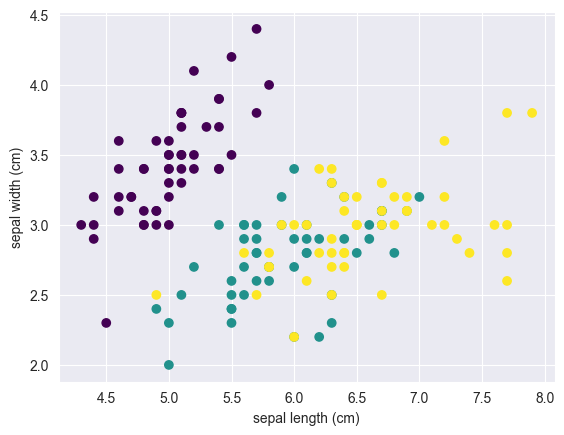

In [10]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis') # 정답별로 컬러 다르게 찍히게 함, cmap: 좀더 잘 보이게   # 나머지 버리고, 2개만 봄
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

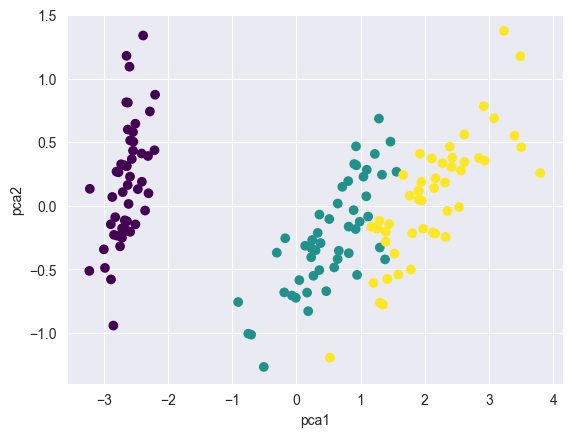

In [13]:
plt.scatter(X_pca[:, 0], X_pca[:,1], c=y, cmap='viridis')
# 버리지 말고 pca를 이용함! 요약본!
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()


# 위에거는 특성 4개 중에서 2개는 버린 거였는데
# 이 코드는pca1, pca2 이렇게 받아와서 원본데이터를 잘 반영한다고 할 수 있다.

In [15]:
# 설명된 분산 비율
pca.explained_variance_ratio_
# 요약을 했는데 성능이 나쁘지 않게 잘 나왔다.~

# 참고 : 축을 맞춘다는 것은 말이지요 -> 우리반 다같이 모여 사진을 찍으면 정방향에서 찍어야 잘 보이겠죠? 이와같이 모두가 잘 나오는 얼굴 각도를 찾는게 축을 찾는 다는 말입니다.

array([0.92461872, 0.05306648])

In [17]:
# pca 데이터로 모델 학습/ 평가
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42,
                                                    stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


rf_clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
print(scores, '->', np.mean(scores))

(120, 2) (120,)
(30, 2) (30,)
[0.91666667 0.95833333 0.95833333 1.         0.91666667] -> 0.95


In [18]:
# 원본데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

rf_clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
print(scores, '->', np.mean(scores))  # 차원 수를 줄였는데 성능이 떨어지지 않았다. 매번 그런 것은 아니고 유                                     동적이다.

(120, 4) (120,)
(30, 4) (30,)
[0.91666667 0.95833333 0.95833333 0.95833333 0.95833333] -> 0.95
